In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data

In [2]:
data = sns.load_dataset('titanic')

# Analyze the Data

In [3]:
data.shape

(891, 15)

In [4]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Statistic Summary

In [7]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Check for Duplication

In [8]:
data.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [9]:
data.duplicated().sum()

107

In [10]:
type(data)

pandas.core.frame.DataFrame

# Missing Values Calculation

In [11]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [13]:
data['age'].skew()


0.38910778230082704

In [14]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Handling Missing Values

In [15]:
data['age'] = data['age'].fillna(data['age'].median())
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])
data = data.drop('deck', axis=1)

In [16]:
data.head(65)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,3,male,22.0,0,0,7.2292,C,Third,man,True,Cherbourg,no,True
61,1,1,female,38.0,0,0,80.0000,S,First,woman,False,Southampton,yes,True
62,0,1,male,45.0,1,0,83.4750,S,First,man,True,Southampton,no,False
63,0,3,male,4.0,3,2,27.9000,S,Third,child,False,Southampton,no,False


# Remove redundant data and columns

In [17]:
data.duplicated().sum()

116

In [18]:
data = data.drop_duplicates()

In [19]:
data.shape

(775, 14)

In [20]:
identicals = data['survived'].equals(data['alive'].apply(lambda x: 1 if x == 'yes' else 0))
print(f"Are Survived and Alive identical comlumns: {identicals}")

Are Survived and Alive identical comlumns: True


In [21]:
print("Unique values in 'embarked':", data['embarked'].unique())
print("Unique values in 'embark_town':", data['embark_town'].unique())

Unique values in 'embarked': ['S' 'C' 'Q']
Unique values in 'embark_town': ['Southampton' 'Cherbourg' 'Queenstown']


In [22]:
embark_mapped = {'S' : 'Southampton', 'C' : 'Cherbourg' , 'Q' : 'Queenstown'}
data['embark_mapped'] = data['embarked'].map(embark_mapped)

In [23]:
identicals = data['embark_mapped'].equals(data['embark_town'])
print(f"Are Survived and Alive identical comlumns: {identicals}")

Are Survived and Alive identical comlumns: True


In [24]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,embark_mapped
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Southampton


In [25]:
data = data.drop('embark_town', axis=1)
data = data.drop('alive', axis=1)
data = data.drop('embark_mapped', axis=1)
data = data.drop('class', axis = 1)

In [26]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True


In [27]:
data.duplicated().sum()

0

In [28]:
data.shape

(775, 11)

In [29]:
data.dtypes

survived        int64
pclass          int64
sex            object
age           float64
sibsp           int64
parch           int64
fare          float64
embarked       object
who            object
adult_male       bool
alone            bool
dtype: object

In [30]:
cat_col = data.select_dtypes(include = ['object', 'bool']).columns
num_col = data.select_dtypes(include = np.number).columns
print("Categorical Variables:")
print(cat_col)
print("Numerical Variables:")
print(num_col)

Categorical Variables:
Index(['sex', 'embarked', 'who', 'adult_male', 'alone'], dtype='object')
Numerical Variables:
Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


In [31]:
categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("\n")

Value counts for sex:
sex
male      483
female    292
Name: count, dtype: int64


Value counts for embarked:
embarked
S    562
C    155
Q     58
Name: count, dtype: int64


Value counts for who:
who
man      443
woman    250
child     82
Name: count, dtype: int64




#  Identifying Outliers

<Axes: xlabel='age'>

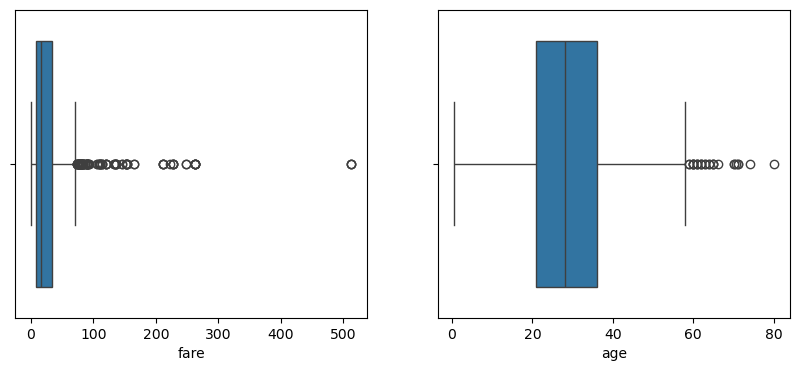

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(ax = axes[0], data = data, x='fare')
sns.boxplot(ax = axes[1], data = data, x='age')

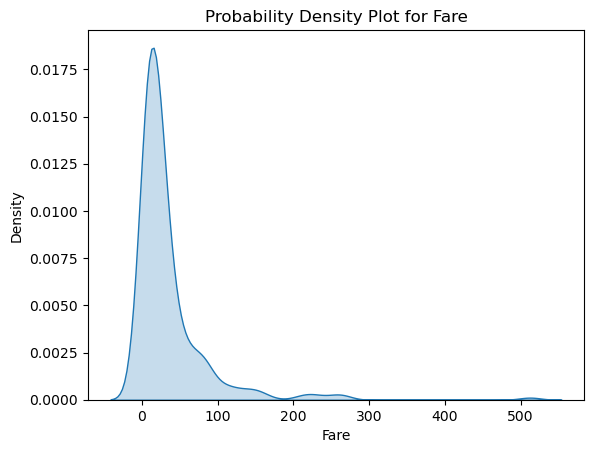

In [33]:
sns.kdeplot(data['fare'], fill=True)
plt.title("Probability Density Plot for Fare")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.show()

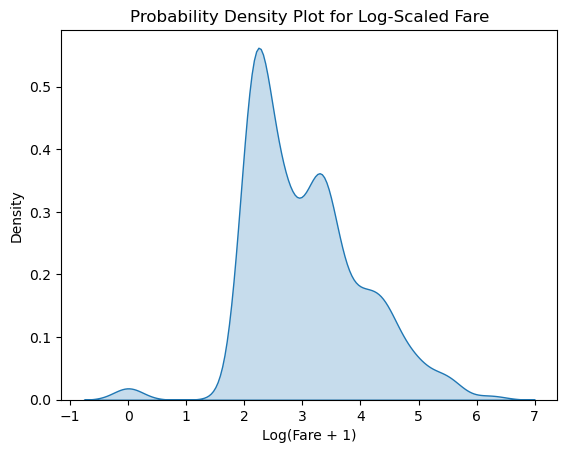

In [34]:
data.loc[:, 'log_fare'] = data['fare'].apply(lambda x: np.log(x + 1))
sns.kdeplot(data['log_fare'], fill=True)
plt.title("Probability Density Plot for Log-Scaled Fare")
plt.xlabel("Log(Fare + 1)")
plt.ylabel("Density")
plt.show()

# Univariate Analysis

## Categorical Variables

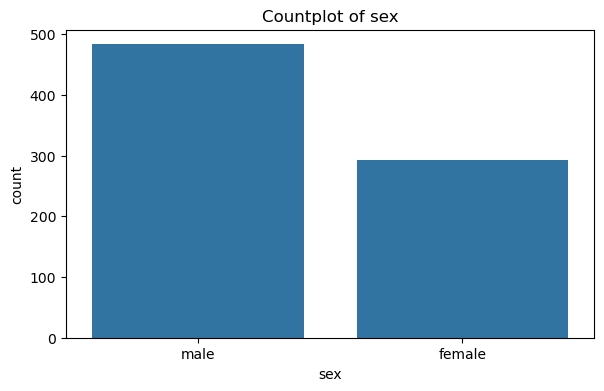

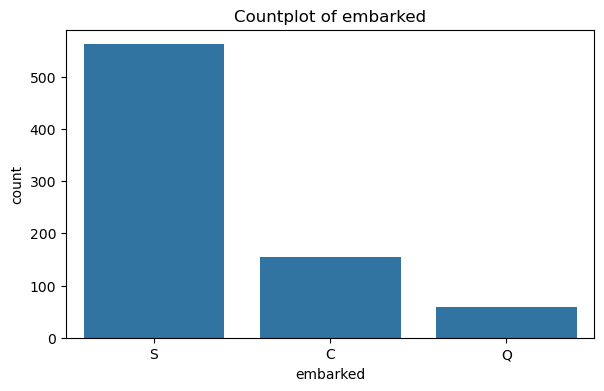

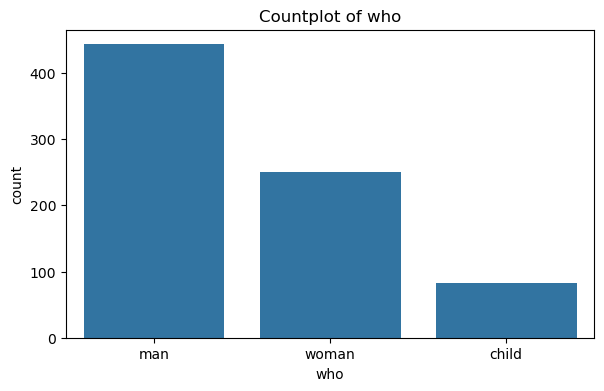

In [35]:
for col in categorical_cols:
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 2)
    sns.countplot(data=data, x=data[col])
    plt.title(f'Countplot of {col}')
    plt.show()

## Numerical Varibles

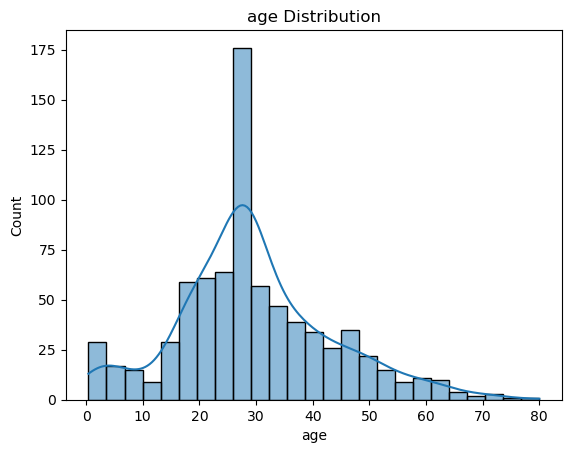

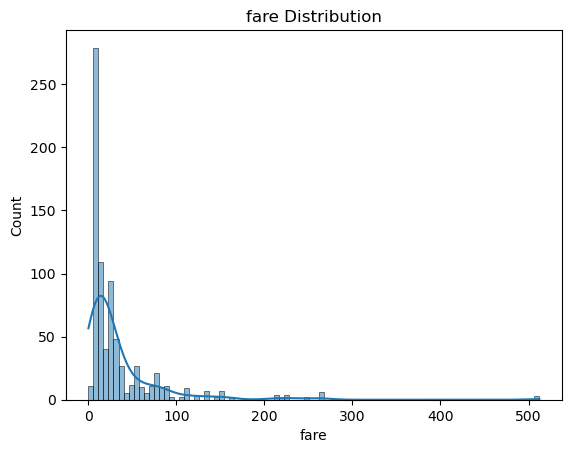

In [36]:
numerical_col = ['age', 'fare']
for col in numerical_col:
    sns.histplot(x=data[col], kde = True)
    plt.title(f'{col} Distribution')
    plt.show()

# Bivariate Analysis

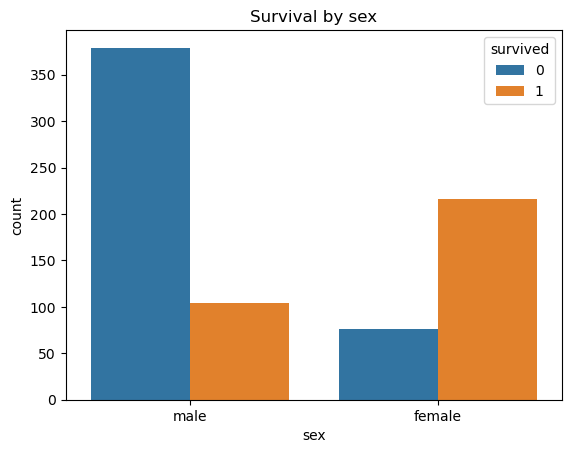

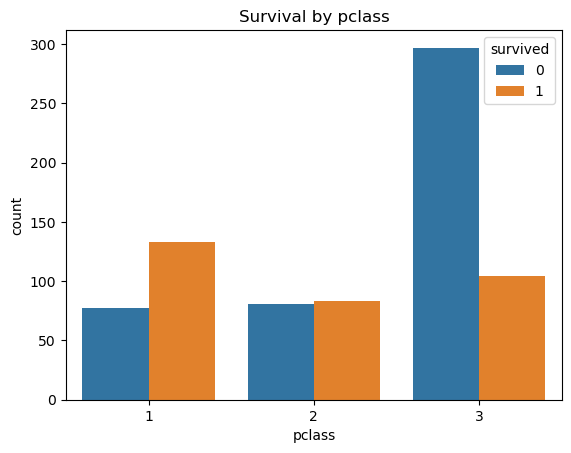

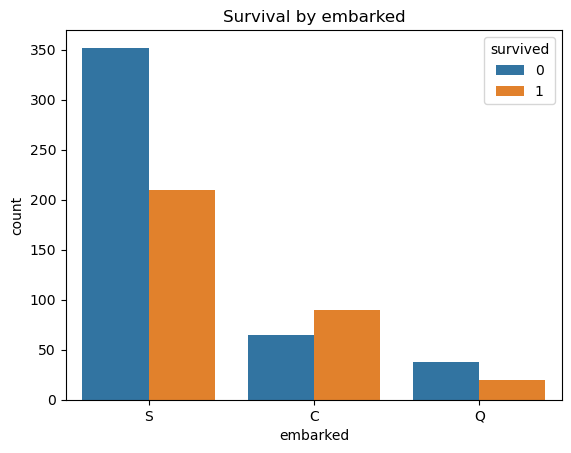

In [37]:
variables = ['sex', 'pclass', 'embarked']
for col in variables:
    sns.countplot(x=data[col], hue='survived', data=data)
    plt.title(f'Survival by {col}')
    plt.show()

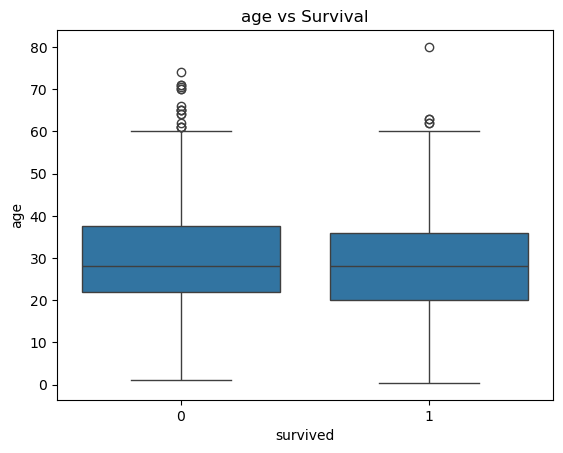

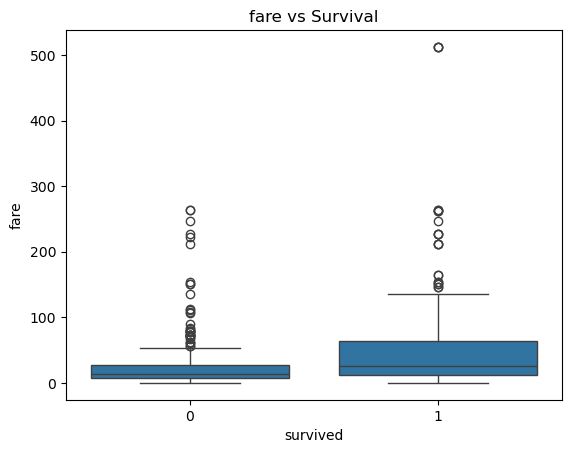

In [38]:
for col in numerical_col:
    sns.boxplot(x='survived', y=data[col], data=data)
    plt.title(f'{col} vs Survival')
    plt.show()

# Multivariate Analysis

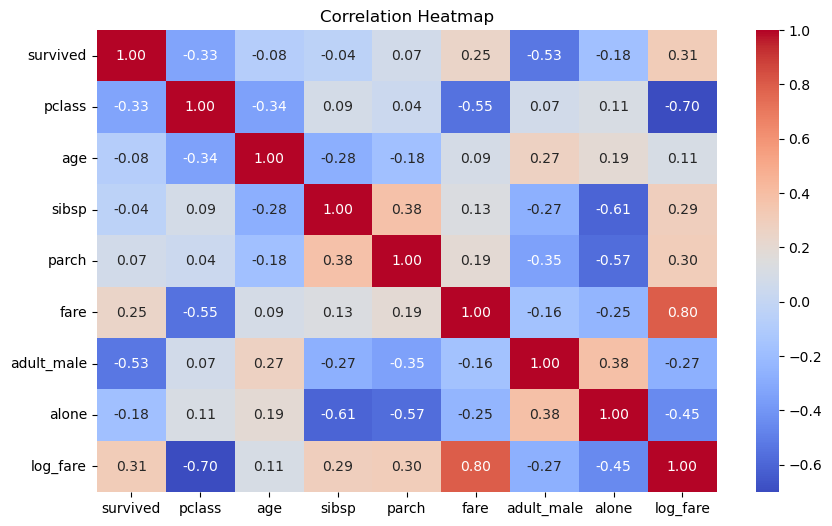

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

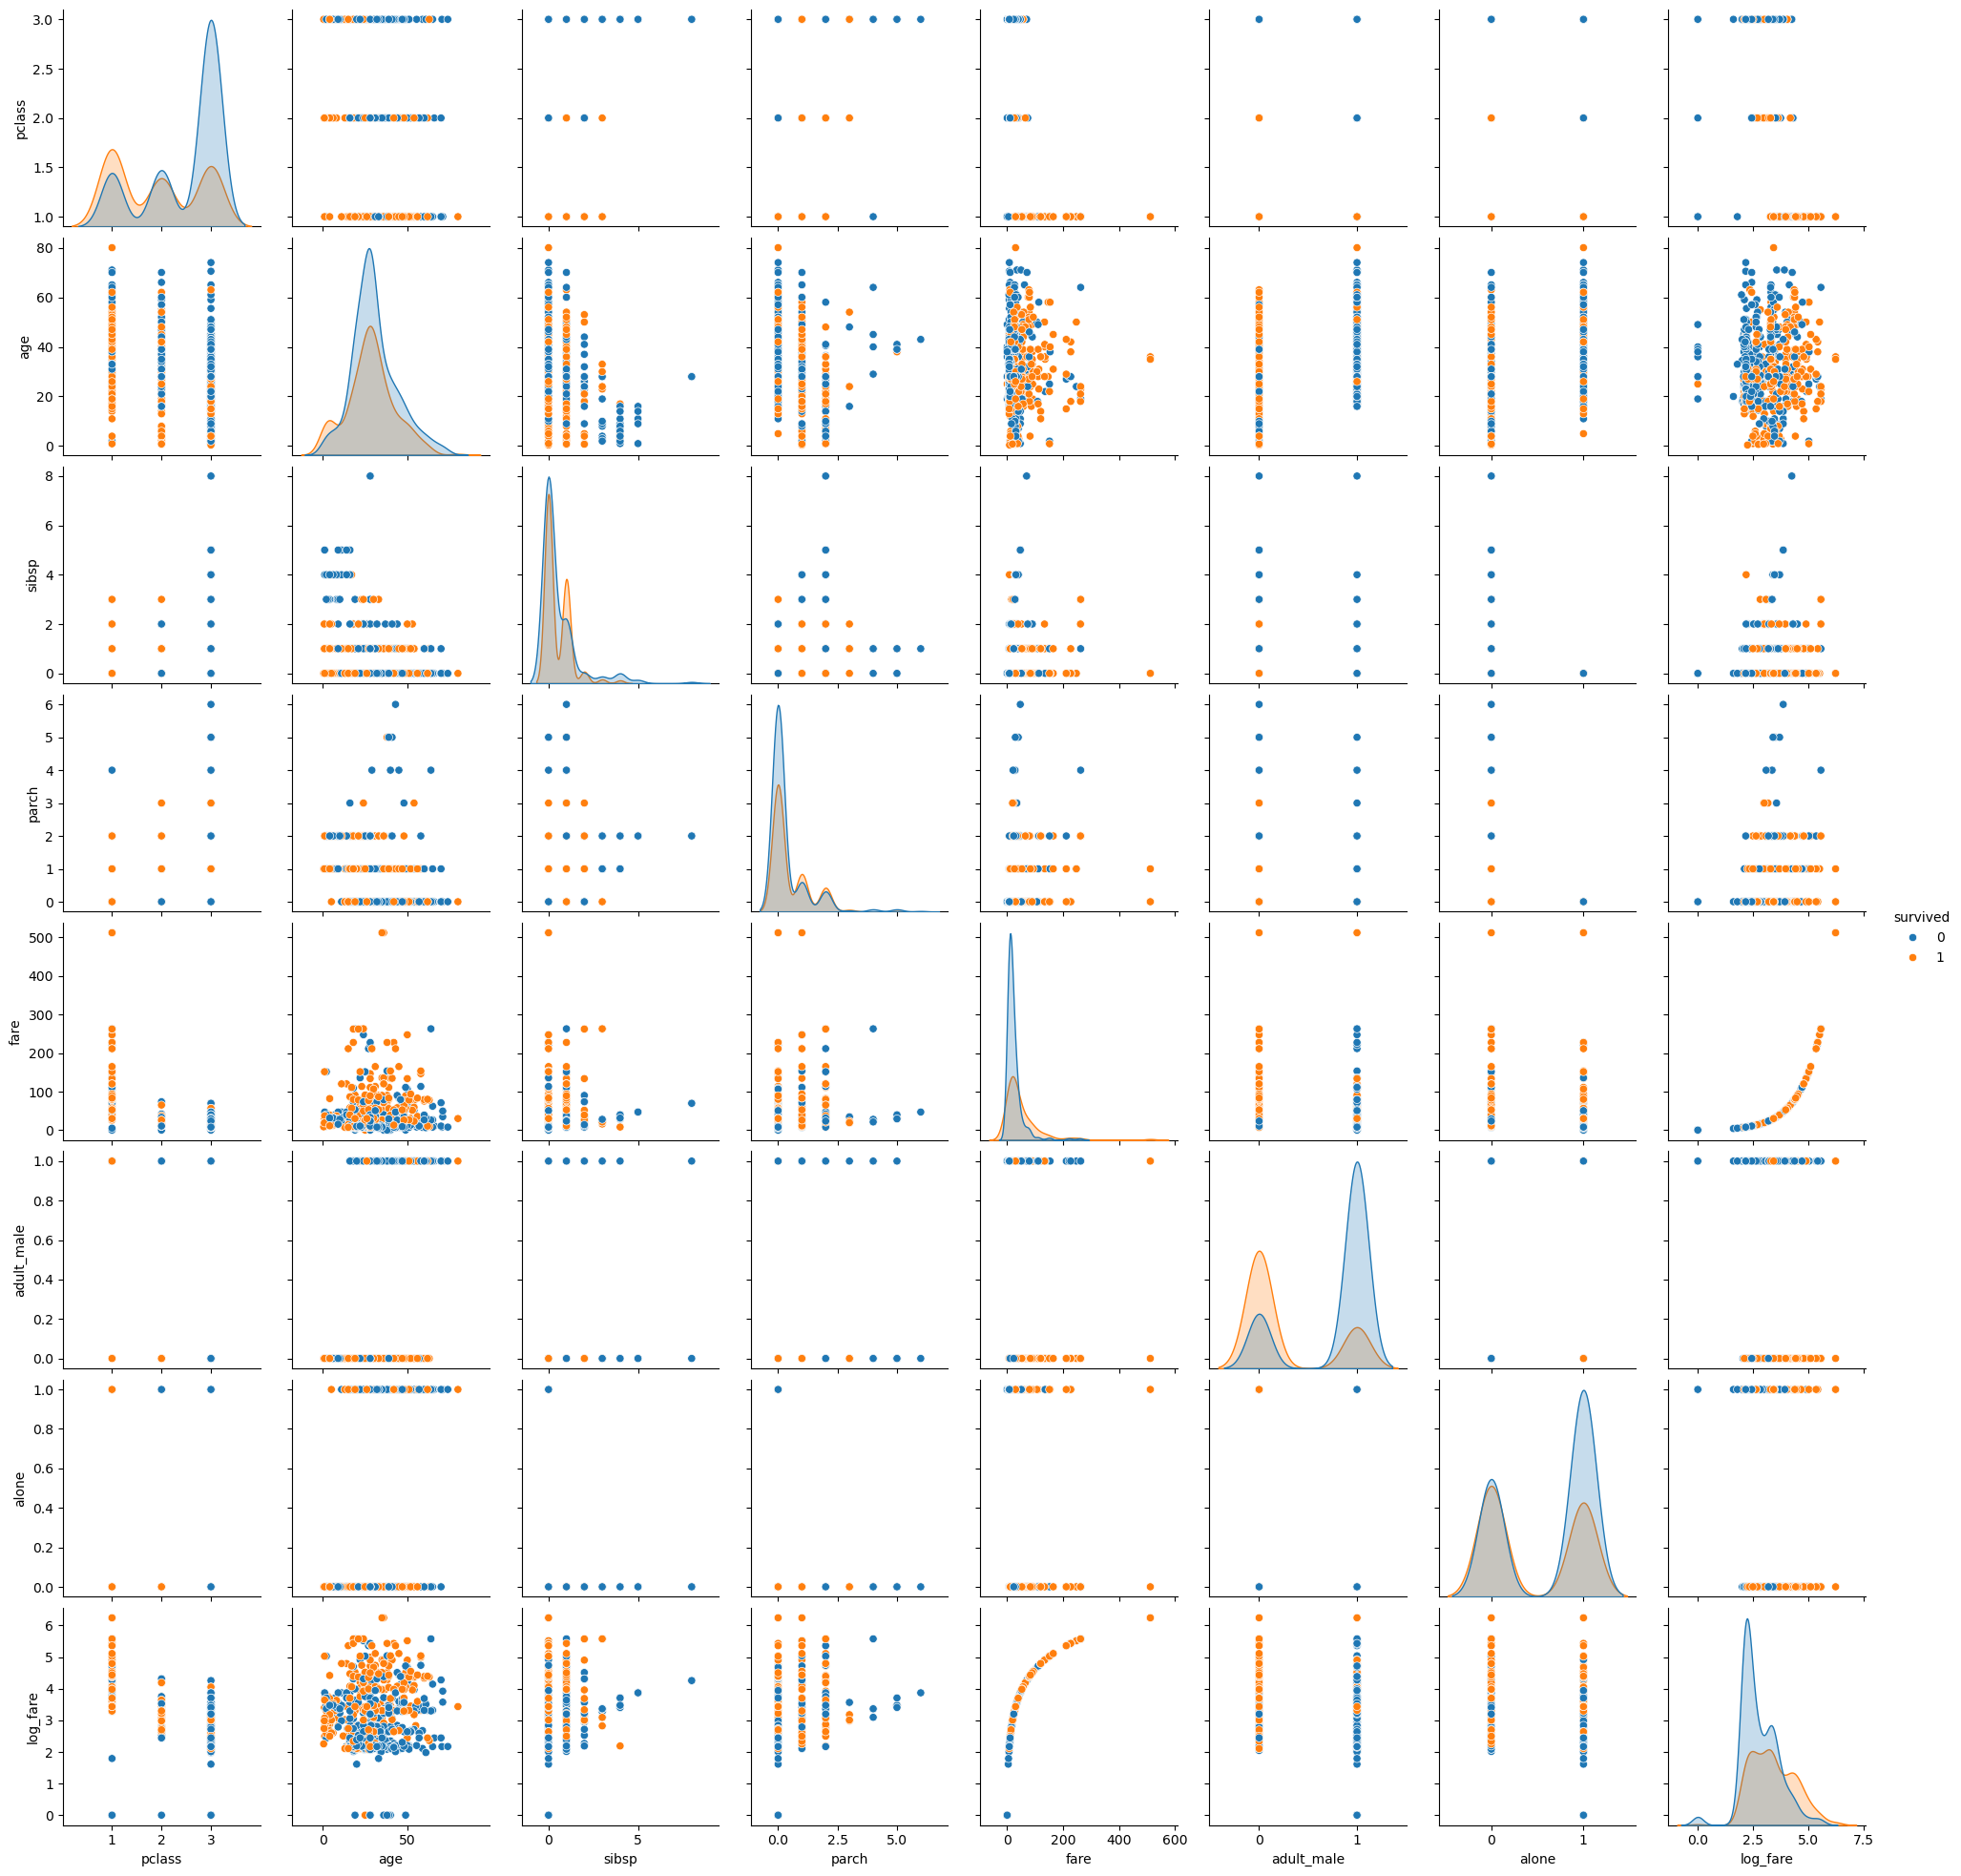

In [40]:
sns.pairplot(data, hue='survived')

<Axes: xlabel='pclass', ylabel='age'>

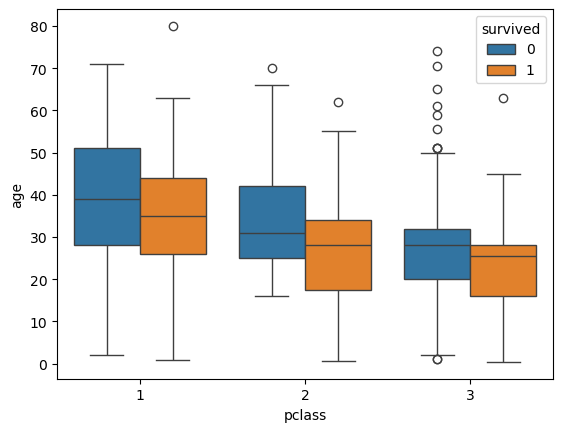

In [41]:
sns.boxplot(x='pclass', y='age', hue='survived', data=data)

In [43]:
import sweetviz as sv

report = sv.analyze(data)
report.show_html("EDA_Report.html")

                                             |                                             | [  0%]   00:00 ->…

Report EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
